In [10]:
from konlpy.tag import Komoran

komoran=Komoran()

import pandas as pd
import os
import numpy as np
def Corona_POS_tag(x):
    Corona=pd.read_csv('/home/u1013/schtm_osy_lsm_kjh/Crawling_Dataset/{0}'.format(x),encoding='utf-8')
    Corona=Corona.drop('Unnamed: 0',axis=1)
    Corona_text=np.array(Corona.loc[:,'Text'].tolist())
    Corona_pos_words=[]
    for i in range(len(Corona)):
        list=[]
        list+=komoran.pos(Corona_text[i])
        Corona_pos_words.append(list)
    total_text=[]
    pos_text=[]
    keyword=['코로나방역','방역','코로나바이러스','19']
    for j in range(len(Corona)):
        text_list=Corona_pos_words[j]
        for i in range(len(text_list)):
            if text_list[i][1] not in ('SF','SP','SS','SE','SO','SW') and text_list[i][0] not in keyword:
                pos_text.append(text_list[i][:])
        total_text.append(pos_text)
        pos_text=[]
    sub_pos=[]
    selected_pos=[]
    for j in range(len(total_text)):
        pos_list=total_text[j]
        for i in range(len(pos_list)):
            if pos_list[i][1] in ('NNG','NNP'):
                sub_pos.append(pos_list[i][0])
        selected_pos.append(sub_pos)
        sub_pos=[]
    for z in range(len(selected_pos)):
        selected_pos[z]=" ".join(selected_pos[z])
    return selected_pos

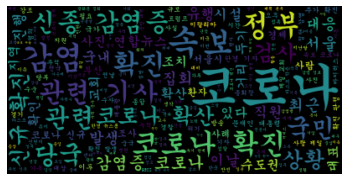

In [3]:
import wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

FONT_PATH = './gungsuh.ttf'

noun_text=''
for i in tag:
    noun_text=noun_text+' '+i
wordcloud=WordCloud(max_font_size=60,relative_scaling=.5,font_path=FONT_PATH).generate(noun_text)
plt.figure()
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
tag=Corona_POS_tag('한국경제TV_코로나방역.csv')

In [21]:
import pickle

with open('한국경제TV_코로나방역_Noun_doc.txt','wb') as f:
    pickle.dump(tag,f)

In [22]:
with open('한국경제TV_코로나방역_Noun_doc.txt','rb') as f:
    read=pickle.load(f)
    print(read)

['사진 연합뉴스 서울시 신종 감염증 코로나 확산 시내버스 업체 지원 비용 지난달 상반기 절반 수준 확인 지원금 서울시 기준 유지 입장 버스 업체 업체 작업 진행 토로 수도권 교회 발 코로나 유행 조짐 가운데 작업 대중교통 집단 감염 뇌관 지적 지원금 감소 한국경제신문 서울시 정보 공개 신청 입수 자료 서울시 버스 업체 지원 비용 상반기 버스 대당 인건비 물품 비 지난달 인건비 물품 비 서울시 지원금 절반 회차 마다 버스 손잡이 봉 의자 소독 기준 준수 지침 지원금 버스 업체 하청 업체 부담 업체 대표 버스 업체 서울시 지원금 이유 7월 기존 금액 절반 수준 계약 요구 버스 대당 투입 작업자 현장 근로자 임금 수지 말 작업자 작업 질 기존 손잡이 소독 수건 이제 소독 기준 선심 복지 치중 예산 평 지하철 비상 서울시 6월 추가경정예산 지하철 비용 확보 서울시의회 제출 추경안 9월 이후 지하철 비용 포함 서울시 관계자 예산 재난 관리 기금 비용 사용 예정 말 관련 기사 신촌세브란스병원 안과 병원 폐쇄 속보 보건 복지부 코로나 박 능 후 수도권 감염 우려 신속 검사 오늘 수도권 학교 교인 1/3 제한 여행 면세 항공 추락 코로나 확산 속보 인천 사랑 제일 교회 교회 발 확진 추가 발생 에이치엘비 자회사 코로나 백신 개발 핵심 주자 선정 정부 코로나 감염 총선 경험 중남미 공유 다인 천 교회 관련 추가 확진 사랑 제일 교회 발 감염 속보 세브란스병원 코로나 추가 확진 재난 관리 기금 사정 지 코로나 대응 기금 여름 기록 집중호우 수해 복구 비용 지출 예정 행정 안전부 6월 말 기준 서울시 재난 관리 기금 소진 남은 기금 적립 재난 관리 기금 의무 예치금 분류 대형 재난 상황 대비 관리 전문가 서울시 선심 복지 사업 치중 기본 예산 편성 서울시 상반기 차례 추경 편성 코로나 관련 예산 추가 확보 예산 재난 긴급 생활비 지급 단기 일자리 창출 사업 배정 박종관 기자 .com', '장 보기 마켓 컬리 운영 컬리 경기도 남양주 화도 냉동 센터 근무 직원 신종 감염증 코로나